### Import the necessary librairies 

In [1]:
import pandas as pd

### Merging all 12 months the CSV Sales data together 

In [2]:
import glob
import os

In [3]:
# merging the files
path = r"C:\Users\johan\OneDrive\Documents\Data_science\Git\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data"
joined_files = os.path.join(path, "Sales*.csv")
  
# A list of all joined files is returned
joined_list = glob.glob(joined_files)
  
# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
all_data = df.copy()
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the Data

The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

#### 1) Drop the rows where we have one NaN 

In [4]:
#We are going to find the rows where at tleast one feature is NaN or "isnull"
null_values = [i for i in all_data.index if all_data.iloc[i].isnull().any()]
null_values

[1,
 356,
 735,
 1433,
 1553,
 1571,
 1992,
 2265,
 2798,
 3024,
 3098,
 4279,
 4562,
 4958,
 5565,
 6109,
 6119,
 6339,
 6430,
 6752,
 7163,
 7572,
 7648,
 8639,
 8896,
 9286,
 9501,
 9592,
 9604,
 9642,
 9699,
 9714,
 9928,
 10252,
 10699,
 11278,
 11442,
 11540,
 11746,
 11881,
 12116,
 12639,
 12805,
 12883,
 13000,
 13110,
 13556,
 13627,
 14115,
 14416,
 15041,
 15934,
 16700,
 16727,
 16763,
 16912,
 17060,
 17446,
 17718,
 18695,
 19605,
 21031,
 21068,
 21502,
 21693,
 22671,
 22687,
 22837,
 23061,
 23902,
 24043,
 24457,
 24824,
 24984,
 25175,
 25890,
 26328,
 26335,
 27066,
 27202,
 27312,
 27804,
 28132,
 28879,
 29097,
 29247,
 29257,
 30658,
 31042,
 31074,
 31779,
 31889,
 32523,
 32614,
 33438,
 33636,
 33767,
 33816,
 33910,
 34157,
 34259,
 34519,
 35085,
 35177,
 35186,
 35330,
 36044,
 36296,
 36572,
 37125,
 37439,
 37835,
 37893,
 38132,
 38584,
 38645,
 39046,
 39057,
 39345,
 39513,
 40780,
 40883,
 40968,
 41111,
 41139,
 41855,
 41885,
 41941,
 42162,
 42710

In [5]:
#This is another way to find the rows directly with the DataFrame 
NaN_df = all_data[all_data.isna().any(axis=1)]
NaN_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Let's drop the rows where all features are NaN : 
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 6)

#### Analyze and clean the Order Date feature

In [7]:
# Let's see if the column Order Date contains only dates 
date_lengths = all_data['Order Date'].str.len()
print(date_lengths)
date_lengths.value_counts()

#So what are those data with only a lenght of 10 ? 

0         14
2         14
3         14
4         14
5         14
          ..
186845    14
186846    14
186847    14
186848    14
186849    14
Name: Order Date, Length: 186305, dtype: int64


14    185950
10       355
Name: Order Date, dtype: int64

In [8]:
Date_Order_10 = all_data[all_data['Order Date'].str.len() < 13]
Date_Order_10

#So we can see that the date with only 10 characters are actually generic dates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
# Let's delete the rows that have the headers instead of real values 
all_data = all_data[all_data['Order Date'].str.len() > 13]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Add additonal features allowing us to analyze the datas

#### We want to have the date formated propely so we can use datetime Python tool 

In [10]:
# Format the Order Date correctly
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format="%m/%d/%y %H:%M")
all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [11]:
# create a new column, month, with the month number 
all_data['month'] = all_data['Order Date'].dt.month

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Exctract the hour and minutes from the Order Date

In [13]:
# create two new column, hour, minute
all_data['hour'] = all_data['Order Date'].dt.hour
all_data['minute'] = all_data['Order Date'].dt.minute

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27


#### Exctract the city and the state from the Purchase Address feature

In [15]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

########       First, you will call the .apply() method on the basebal_df dataframe.       #############
########       Then use the lambda function to iterate over the rows of the dataframe.     #############

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + '(' + get_state(x)+ ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,minute,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,Boston (MA)
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,Los Angeles (CA)


## Data Analysis : Find insights 

### Question 1: What was the best month for sales? How much was earned that month?

In [16]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] = all_data['Price Each'].astype('float')

In [17]:
Sales_months = all_data.groupby(['month'])['Sales'].sum().reset_index()

In [18]:
all_data.groupby(['month']).sum()

,Quantity Ordered,Price Each,hour,minute,Sales
month,,,,,
1,10903,1811768.38,139485,282440,1822256.73
2,13449,2188884.72,172669,354885,2202022.42
3,17005,2791207.83,218969,447559,2807100.38
4,20558,3367671.02,262259,544186,3390670.24
5,18667,3135125.13,238780,487899,3152606.75
6,15253,2562025.61,195528,402436,2577802.26
7,16072,2632539.56,206169,417349,2647775.76
8,13448,2230345.42,172289,353857,2244467.88
9,13109,2084992.09,168513,341698,2097560.13


In [19]:
Sales_months['month']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: month, dtype: int64

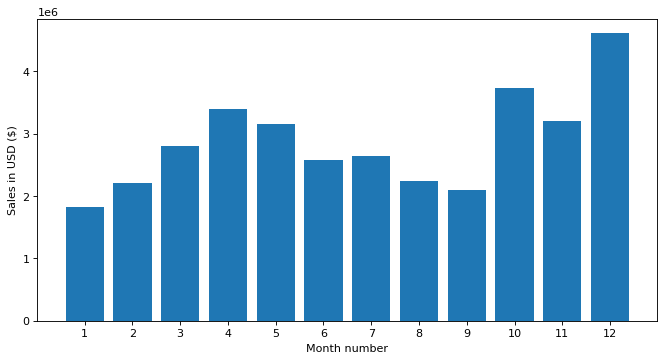

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=80)
plt.bar(Sales_months['month'],Sales_months['Sales'])
plt.xticks(Sales_months['month'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### Question 2: What city sold the most product?

In [21]:
City_sales = all_data.groupby(['City']).sum().reset_index()
City_sales

,City,Quantity Ordered,Price Each,month,hour,minute,Sales
0,Atlanta (GA),16602,2779908.20,104794,214264,442932,2795498.58
1,Austin (TX),11153,1809873.61,69829,141946,289060,1819581.75
2,Boston (MA),22528,3637409.77,141112,288225,590442,3661642.01
3,Dallas (TX),16730,2752627.82,104620,214390,435155,2767975.40
4,Los Angeles (CA),33289,5421435.23,208325,427444,866638,5452570.80
5,New York City (NY),27932,4635370.83,175741,357696,733598,4664317.43
6,Portland (ME),2750,447189.25,17144,35211,72856,449758.27
7,Portland (OR),11303,1860558.22,70621,144421,295533,1870732.34
8,San Francisco (CA),50239,8211461.74,315520,643265,1319477,8262203.91
9,Seattle (WA),16553,2733296.01,104941,213292,436368,2747755.48


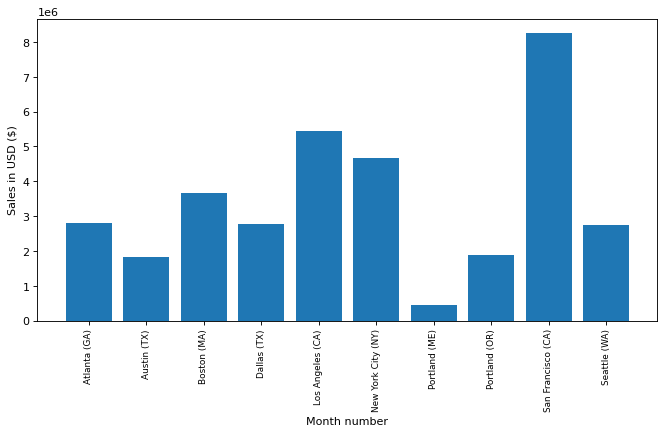

In [22]:
#You can catch the X labels like this or Directly in the City Sales 
keys = [city for city, df in all_data.groupby(['City'])]

plt.figure(figsize=(10, 5), dpi=80)
plt.bar(City_sales['City'],City_sales['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(City_sales['City'], rotation='vertical', size=8)
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [23]:
Time_Sales = all_data.groupby(['hour']).count()
Time_Sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,minute,City,Sales
hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


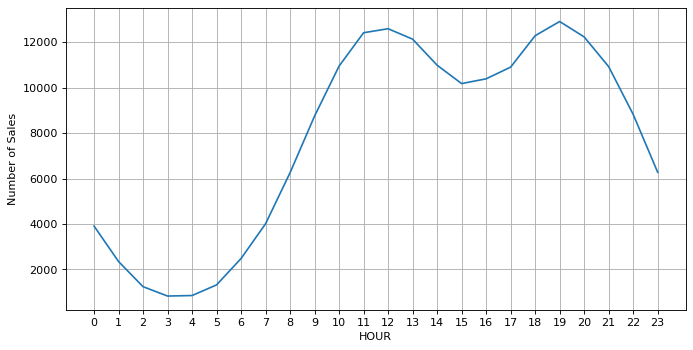

In [24]:
plt.figure(figsize=(10, 5), dpi=80)
plt.grid()
plt.plot(Time_Sales.index,Time_Sales['Sales'])
plt.ylabel('Number of Sales')
plt.xlabel('HOUR')
plt.xticks(Time_Sales.index)
plt.show()
# My recommendation is slightly before 11am or 7pm

### Question 4: What products are most often sold together?

What two orders sold together have in comon ? They have the same Order ID, therefore we need to select the raws where at least an Order ID is issued to 2 or more products. 

In [25]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)] # By setting keep on False, all duplicates are True.
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,minute,City,Sales
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Los Angeles (CA),11.99
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,19,42,Los Angeles (CA),600.00
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,19,42,Los Angeles (CA),11.95
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,11,31,Boston (MA),99.99
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,20,18,Atlanta (GA),3.84
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,0,25,Atlanta (GA),11.99
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,0,25,Atlanta (GA),5.98
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,13,49,San Francisco (CA),600.00


#### Now we have df, a dataframe with only product that belong to a purchase of 2 or more items : 

Let's try to join the products to make sure every Order ID contains the entire pruchase : 

In [26]:
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df

C:\Users\johan\anaconda3\envs\PyCharmLearningProject\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,hour,minute,City,Sales,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Los Angeles (CA),600.00,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,Los Angeles (CA),11.99,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,19,42,Los Angeles (CA),600.00,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,19,42,Los Angeles (CA),11.95,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,11,31,Boston (MA),99.99,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,20,18,Atlanta (GA),3.84,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,0,25,Atlanta (GA),11.99,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,0,25,Atlanta (GA),5.98,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,13,49,San Francisco (CA),600.00,"Google Phone,USB-C Charging Cable"


#### Now we have all informations per raws let's delete the duplicates : 

In [27]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [28]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
df3 = df2.groupby('Grouped').count().sort_values(by = 'Order ID', ascending=False)
df3.head(15)

# Let's cut our Dataframe at 10 objects : 

df4 = df3.iloc[:10]
df4.head(10)


,Order ID
Grouped,
"iPhone,Lightning Charging Cable",882
"Google Phone,USB-C Charging Cable",856
"iPhone,Wired Headphones",361
"Vareebadd Phone,USB-C Charging Cable",312
"Google Phone,Wired Headphones",303
"iPhone,Apple Airpods Headphones",286
"Google Phone,Bose SoundSport Headphones",161
"Vareebadd Phone,Wired Headphones",104
"Google Phone,USB-C Charging Cable,Wired Headphones",77


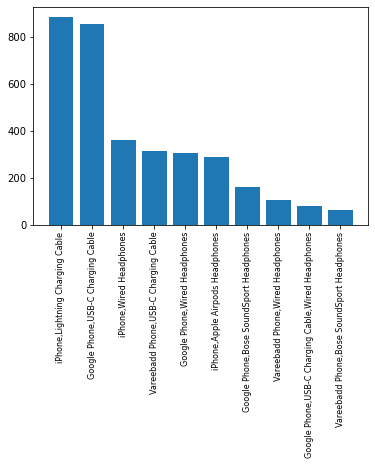

In [29]:
plt.bar(df4.index, df4['Order ID'])
plt.xticks(df4.index, rotation='vertical', size=8)
plt.show()

#Regarding those Data it's a certainty that marleting needs to add offers like "Iphone + 30%off L Charging cable"

### Question 5 What product sold the most? Why do you think it sold the most?

In [30]:
Sold_most = all_data.groupby('Product').sum()
Sold_most

,Quantity Ordered,Price Each,month,hour,minute,Sales
Product,,,,,,
20in Monitor,4129,451068.99,29336,58764,122252,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,90916,184331,2435097.56
27in FHD Monitor,7550,1125974.93,52558,107540,219948,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,89076,183480,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,298342,609039,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,297332,612113,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,223304,455570,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,192445,392603,1345565.43
Flatscreen TV,4819,1440000.00,34224,68815,142789,1445700.00


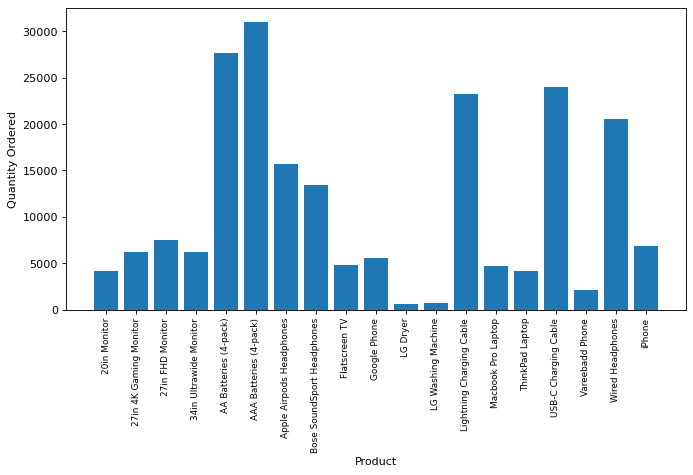

In [31]:
plt.figure(figsize=(10, 5), dpi=80)
plt.bar(Sold_most.index,Sold_most['Quantity Ordered'])
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(Sold_most.index, rotation='vertical', size=8)
plt.show()

In [40]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = all_data.groupby('Product').mean()['Price Each']

keys = [pair for pair, df in product_group]

product_group.head()
quantity_ordered.head(20)
prices.head(100)
keys


['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

C:\Users\johan\AppData\Local\Temp/ipykernel_17172/1776558852.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\johan\AppData\Local\Temp/ipykernel_17172/1776558852.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


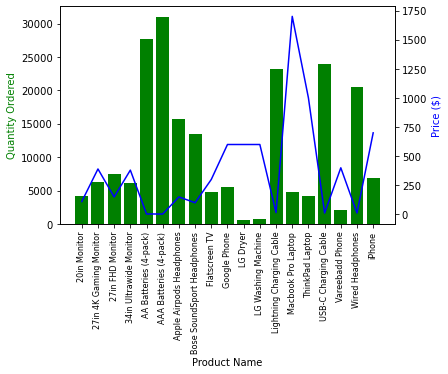

In [41]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()